# Load DataSet

In [1]:
!wget -p dataset/  http://www.lookingatpeople.com/data/Daimler/pami06-munder-gavrila/DC-ped-dataset_base.tar.gz
!tar -xvf  /content/www.lookingatpeople.com/data/Daimler/pami06-munder-gavrila/DC-ped-dataset_base.tar.gz

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
T2/non-ped_examples/img_00019.pgm
T2/non-ped_examples/img_03167.pgm
T2/non-ped_examples/img_04442.pgm
T2/non-ped_examples/img_00707.pgm
T2/non-ped_examples/img_03855.pgm
T2/non-ped_examples/img_01992.pgm
T2/non-ped_examples/img_03168.pgm
T2/non-ped_examples/img_04443.pgm
T2/non-ped_examples/img_02580.pgm
T2/non-ped_examples/img_00708.pgm
T2/non-ped_examples/img_03856.pgm
T2/non-ped_examples/img_01993.pgm
T2/non-ped_examples/img_00020.pgm
T2/non-ped_examples/img_03169.pgm
T2/non-ped_examples/img_04444.pgm
T2/non-ped_examples/img_02581.pgm
T2/non-ped_examples/img_00709.pgm
T2/non-ped_examples/img_03857.pgm
T2/non-ped_examples/img_01994.pgm
T2/non-ped_examples/img_00021.pgm
T2/non-ped_examples/img_04445.pgm
T2/non-ped_examples/img_02582.pgm
T2/non-ped_examples/img_03858.pgm
T2/non-ped_examples/img_01995.pgm
T2/non-ped_examples/img_00022.pgm
T2/non-ped_examples/img_03170.pgm
T2/non-ped_examples/img_04446.pgm
T2/n

# Data Set Summary & Exploration

In [13]:
import cv2
import glob
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.feature import hog
import random


# Load images.
images_ped = list(map(lambda imageFileName: (cv2.imread(imageFileName,0),1),
                              glob.glob('*/ped_examples/*.pgm')))
images_Nonped = list(map(lambda imageFileName: (cv2.imread(imageFileName,0),0),
                              glob.glob('*/non-ped_examples/*.pgm')))
# prepare dataset i take only 1e5 from each classe 0 and 1
images_data=images_ped[:10000].copy()
images_data.extend(images_Nonped[:10000])

# shuffle
random.shuffle(images_data)
print("Done importing images.")

Done importing images.


In [3]:
print("Total Number of Images = ", len(images_data))
print("Number of Ped Images = ", len(images_ped))
print("INumber of Non Ped Images =", len(images_Nonped))
print("Image data shape = ",images_ped[0][0].shape)

Total Number of Images =  20000
Number of Ped Images =  24000
INumber of Non Ped Images = 25000
Image data shape =  (36, 18)


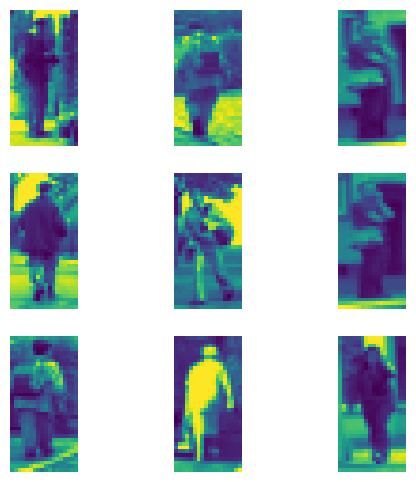

In [14]:
# display function
def showImages(images, cols = 4, rows = 5, figsize=(6,6)):
    imgLength = len(images)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    indexes = range(cols * rows)
    for ax, index in zip(axes.flat, indexes):
        if index < imgLength:
            image = images[index][0]
            ax.imshow(image)
            ax.axis('off')

# images of ped
showImages(images_ped, 3, 3)
# plt.savefig("ped.png")

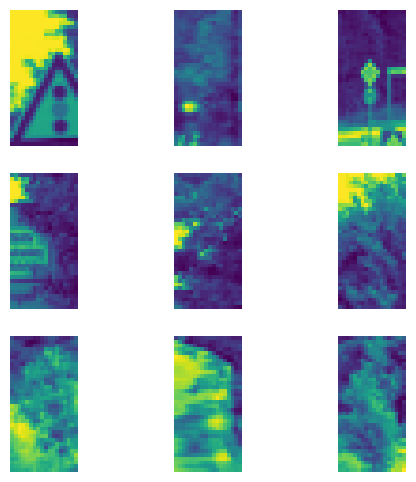

In [15]:
# images of Nonped
showImages(images_Nonped, 3, 3)
# plt.savefig("nonped.png")

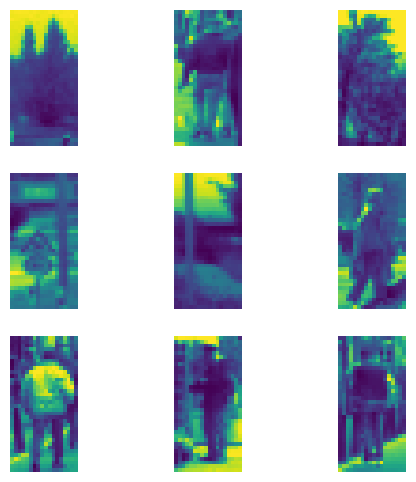

In [16]:
# Shuffled images
showImages(images_data, 3, 3)
# plt.savefig("shuffled.png")

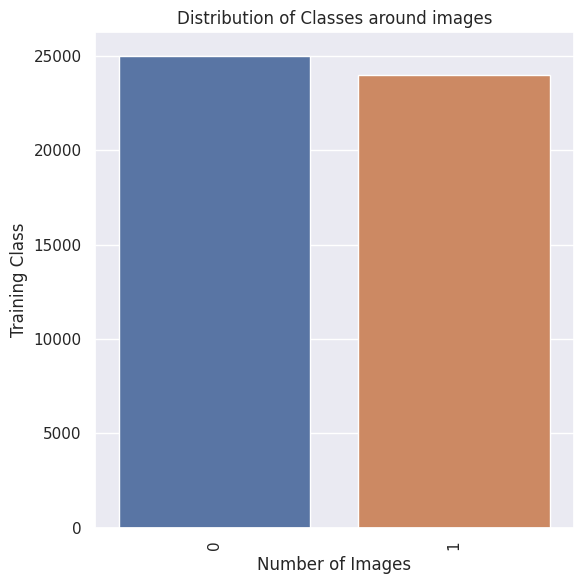

In [17]:
counts = {
    "lables":[0,1],
    "images_count":[len(images_Nonped),len(images_ped)]
}
plt.figure(figsize=(6,6))
sns.set(font_scale=1)
sns.barplot(data=counts,x='lables',y='images_count')
plt.xticks(rotation=90)
plt.ylabel('Training Class')
plt.xlabel('Number of Images');
plt.title("Distribution of Classes around images")
plt.tight_layout()
# plt.savefig("Distribution.png")

# Images Pre-processing

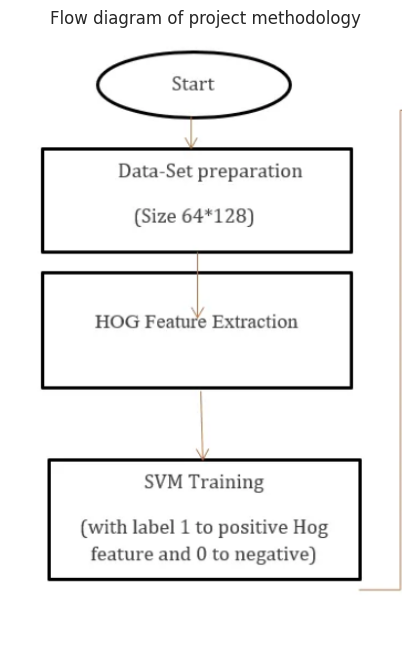

In [ ]:
# Flow diagram of project methodology
img_diagram = cv2.imread("/content/peiton_class.png")
plt.figure(figsize=(8,8))
plt.title("Flow diagram of project methodology")
plt.axis("off")
plt.imshow(img_diagram)


In [8]:
from skimage.feature import hog

hog_imgs = []
hog_features=[]
lables=[]
for img in images_data :
  resized_img=cv2.resize(img[0],(64,128))
  hog_feature, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), visualize=True, multichannel=False)
  hog_imgs.append(hog_image)
  hog_features.append(hog_feature)
  lables.append(img[1])


<ipython-input-8-ce94bca8970e>:8: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


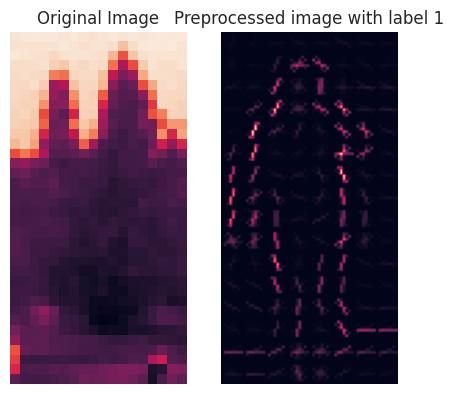

In [23]:
# visulize
fig = plt.figure(figsize=(5,5))
(ax1,ax2) = fig.subplots(1,2)
ax1.imshow(images_data[0][0])
ax2.imshow(hog_imgs[0])
ax1.set_title("Original Image")
ax2.set_title("Preprocessed image with label "+str(lables[0]))
ax1.axis("off")
ax2.axis("off")
# plt.savefig("processed_img.png")

# Features and Labels

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np

hog_features = np.asarray(hog_features)
lables = np.asarray(lables)

# split data into train data & test data
X_train,X_test,y_train,y_test=train_test_split(hog_features,lables,test_size=.2,shuffle=True)
print("X_train shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",X_test.shape)
print("y_test shape : ",y_test.shape)

X_train shape :  (16000, 3780)
y_train shape :  (16000,)
X_test shape :  (4000, 3780)
y_test shape :  (4000,)


# Train & Evaluate the Model

In [10]:
from sklearn.svm import SVC

svm_mod = SVC()
svm_mod.fit(X_train, y_train)


SVC()

In [ ]:
print('Accuracy of Decision Tree classifer on train set: {:.2f}'.format(svm_mod.score(X_train, y_train)))
print('Accuracy of Decision Tree classifer on test set: {:.2f}'.format(svm_mod.score(X_test, y_test)))

Accuracy of Decision Tree classifer on train set: 1.00
Accuracy of Decision Tree classifer on test set: 0.98


In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

y_pred = svm_mod.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of the model : {:.2f}'.format(accuracy))

Accuracy of the model : 0.98


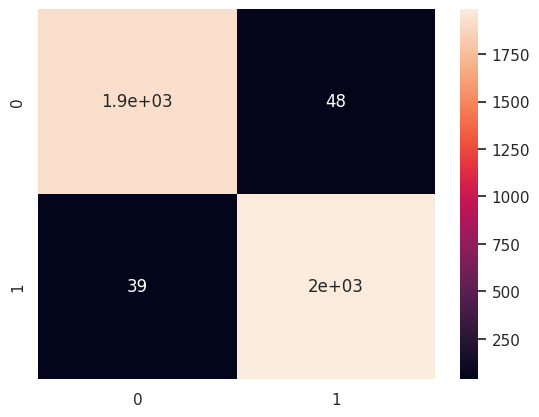

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data=cm,annot=True)
plt.savefig("confusion_matrix.png")

# Test a Model on New Images

In [29]:
import pandas as pd
import numpy as np
from skimage.feature import hog


new_mages_tuple = images_ped[10001:10011].copy()
new_mages_tuple.extend(images_Nonped[10001:10011])
print(len(new_mages_tuple))

# shuffle
random.shuffle(new_mages_tuple)

new_mages=[img[0] for img in new_mages_tuple]
lables_act = [img[1] for img in new_mages_tuple]

# preprcesse testing images
processed_imgs = []
hog_f = []
for img in new_mages:
  resized_img=cv2.resize(img,(64,128))
  hog_feature, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), visualize=True, multichannel=False)
  processed_imgs.append(hog_image)
  hog_f.append(hog_feature)

hog_f = np.asarray(hog_f)

# Predict
y_pred = svm_mod.predict(hog_f)

results = {
    "actuel lable": lables_act,
    "predict_lables":y_pred
}

df_result = pd.DataFrame(results)

df_result

20


<ipython-input-29-cf89f0320dba>:21: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feature, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


,actuel lable,predict_lables
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
5,0,0
6,1,1
7,0,0
8,1,1
9,0,0


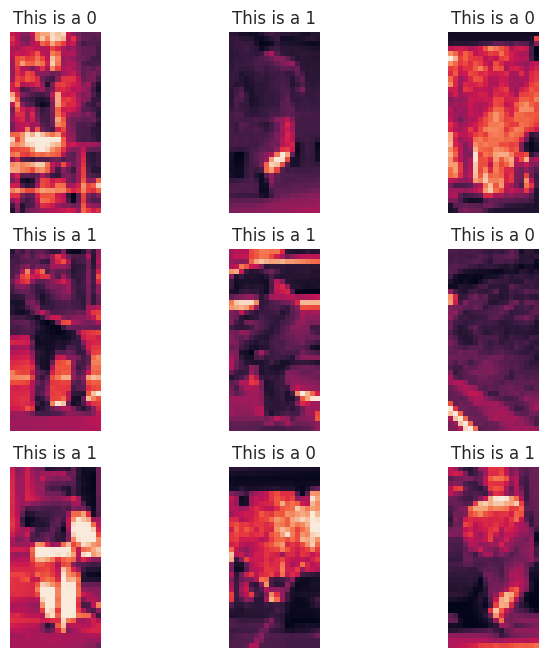

In [30]:
# display function
def showImages(images, cols = 4, rows = 5, figsize=(8,8)):
    imgLength = len(images)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    indexes = range(cols * rows)
    for ax, index in zip(axes.flat, indexes):
        if index < imgLength:
            image = images[index]
            ax.set_title("This is a "+str(y_pred[index]))
            ax.imshow(image)
            ax.axis('off')

# images of ped
showImages(new_mages, 3, 3)
plt.savefig("resulst.png")

# Tuning the hyper-parameters of SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)


In [ ]:
print(grid.best_estimator_)